In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans
from sklearn.calibration import LabelEncoder
import joblib

In [462]:
df = pd.read_csv('CustomerData.csv')
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             100 non-null    object 
 1   Age                    100 non-null    int64  
 2   Gender                 100 non-null    object 
 3   City                   100 non-null    object 
 4   AnnualIncome           99 non-null     float64
 5   TotalSpent             100 non-null    int64  
 6   MonthlyPurchases       100 non-null    int64  
 7   AvgOrderValue          100 non-null    int64  
 8   AppTimeMinutes         98 non-null     float64
 9   DiscountUsage          98 non-null     object 
 10  PreferredShoppingTime  99 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.7+ KB


(100, 11)

In [463]:
df_Remove=df.sort_values("AnnualIncome",ascending=False).head(10)
df=df.drop(df_Remove.index)
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             90 non-null     object 
 1   Age                    90 non-null     int64  
 2   Gender                 90 non-null     object 
 3   City                   90 non-null     object 
 4   AnnualIncome           89 non-null     float64
 5   TotalSpent             90 non-null     int64  
 6   MonthlyPurchases       90 non-null     int64  
 7   AvgOrderValue          90 non-null     int64  
 8   AppTimeMinutes         88 non-null     float64
 9   DiscountUsage          88 non-null     object 
 10  PreferredShoppingTime  89 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ KB


(90, 11)

In [464]:
print(df_Remove)

   CustomerID  Age Gender       City  AnnualIncome  TotalSpent  \
40       C041   59      M     Mumbai     2200000.0     1700000   
8        C009   55      M     Mumbai     2000000.0     1500000   
53       C054   55      M     Mumbai     1900000.0     1400000   
25       C026   57      M  Bangalore     1800000.0     1250000   
72       C073   52      M     Mumbai     1750000.0     1350000   
47       C048   51      M     Mumbai     1600000.0     1200000   
87       C088   59      M    Chennai     1600000.0     1100000   
13       C014   46      M    Chennai     1500000.0     1100000   
32       C033   49      M     Mumbai     1400000.0      980000   
96       C097   55      M  Bangalore     1400000.0      980000   

    MonthlyPurchases  AvgOrderValue  AppTimeMinutes DiscountUsage  \
40                24          19000           190.0           Low   
8                 22          18000           180.0           Low   
53                23          17000           175.0           Low 

<Axes: >

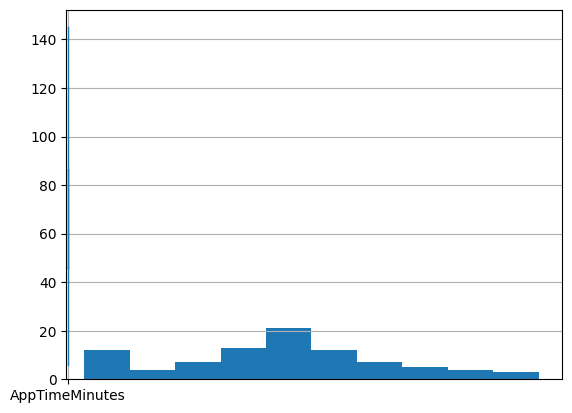

In [465]:
df['AppTimeMinutes'].hist()
df.boxplot(column='AppTimeMinutes')

<Axes: >

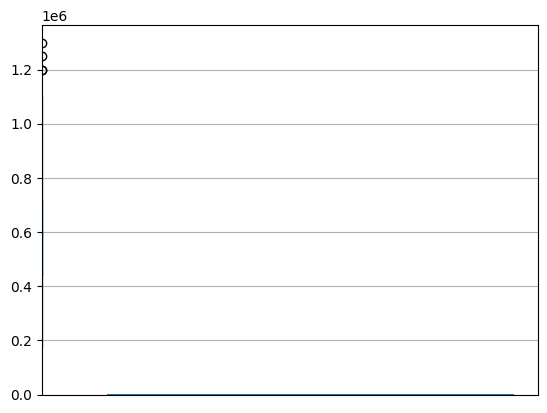

In [466]:
df['AnnualIncome'].hist()
df.boxplot(column='AnnualIncome')

In [467]:
mean_value = df["AppTimeMinutes"].mean()
df["AppTimeMinutes"] = df["AppTimeMinutes"].fillna(mean_value)
print(mean_value)

65.69318181818181


In [468]:
median_value = df["AnnualIncome"].median()
df["AnnualIncome"] = df["AnnualIncome"].fillna(median_value)
df["AnnualIncome"].isnull().sum()
#print(median_value)

np.int64(0)

In [469]:
median_value = df["PreferredShoppingTime"].mode()
df["PreferredShoppingTime"] = df["PreferredShoppingTime"].fillna(median_value)
print(median_value)

0    Day
Name: PreferredShoppingTime, dtype: object


In [470]:
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             90 non-null     object 
 1   Age                    90 non-null     int64  
 2   Gender                 90 non-null     object 
 3   City                   90 non-null     object 
 4   AnnualIncome           90 non-null     float64
 5   TotalSpent             90 non-null     int64  
 6   MonthlyPurchases       90 non-null     int64  
 7   AvgOrderValue          90 non-null     int64  
 8   AppTimeMinutes         90 non-null     float64
 9   DiscountUsage          88 non-null     object 
 10  PreferredShoppingTime  89 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ KB


(90, 11)

In [471]:
le = LabelEncoder()
df["DiscountUsage_encoded"] = le.fit_transform(df["DiscountUsage"])

In [472]:
le = LabelEncoder()
df["Gender_encoded"] = le.fit_transform(df["Gender"])
le = LabelEncoder()
df["PreferredShoppingTime_encoded"] = le.fit_transform(df["PreferredShoppingTime"])
le = LabelEncoder()
df["City_encoded"] = le.fit_transform(df["City"])

In [473]:
df.drop(["CustomerID","Gender","City","PreferredShoppingTime","DiscountUsage"], axis=1, inplace=True)

In [474]:
print(df)

    Age  AnnualIncome  TotalSpent  MonthlyPurchases  AvgOrderValue  \
0    28      450000.0      120000                 6           2000   
1    35     1200000.0      850000                18          12000   
2    42      300000.0       75000                 3           1800   
3    26      560000.0       40000                 2           1500   
4    39      950000.0      600000                15           9000   
..  ...           ...         ...               ...            ...   
94   48      950000.0      620000                16           9000   
95   32      520000.0      210000                 8           2800   
97   37      590000.0      260000                 9           3100   
98   24      200000.0       30000                 1           1200   
99   46      880000.0      520000                14           7400   

    AppTimeMinutes  DiscountUsage_encoded  Gender_encoded  \
0        45.000000                      2               0   
1       120.000000                   

In [475]:
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            90 non-null     int64  
 1   AnnualIncome                   90 non-null     float64
 2   TotalSpent                     90 non-null     int64  
 3   MonthlyPurchases               90 non-null     int64  
 4   AvgOrderValue                  90 non-null     int64  
 5   AppTimeMinutes                 90 non-null     float64
 6   DiscountUsage_encoded          90 non-null     int64  
 7   Gender_encoded                 90 non-null     int64  
 8   PreferredShoppingTime_encoded  90 non-null     int64  
 9   City_encoded                   90 non-null     int64  
dtypes: float64(2), int64(8)
memory usage: 7.7 KB


(90, 10)

In [476]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

[900.0, 546.0112234282178, 395.4398029492105, 339.617883239561]


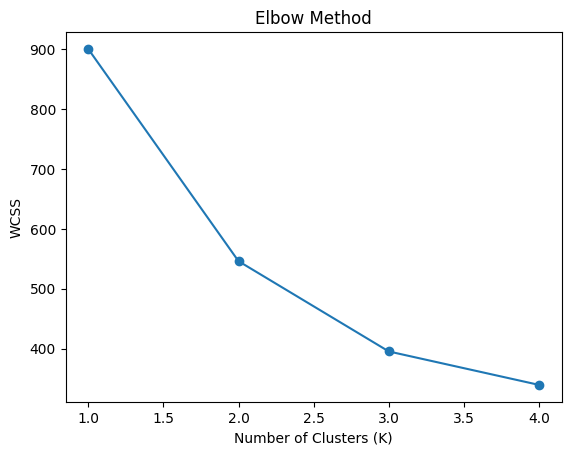

In [477]:
wcss = [] 

for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1, 5), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [478]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) 
kmeans.fit(X_scaled)
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 
centroids_original = scaler.inverse_transform(centroids)
df['cluster']=labels
print(centroids_original)

[[ 4.55789474e+01  9.83684211e+05  6.18947368e+05  1.54210526e+01
   8.95789474e+03  1.09878589e+02  1.47368421e+00  4.73684211e-01
   9.47368421e-01  1.94736842e+00]
 [ 3.46346154e+01  5.69423077e+05  2.47307692e+05  8.50000000e+00
   3.35865385e+03  6.67056381e+01  1.98076923e+00  4.23076923e-01
   3.65384615e-01  3.01923077e+00]
 [ 3.26842105e+01  2.77894737e+05  5.36842105e+04  2.21052632e+00
   1.53684211e+03  1.87368421e+01  4.44089210e-16  5.26315789e-01
  -1.11022302e-16  3.15789474e+00]]


In [479]:
cluster_names = {
    0: "Price-Sensitive Occasional Customers",
    1: "Value-Seeking Regular Customers",
    2: "High-Value Loyal Customers",
}
# assign names to clusters based on centroids
df['cluster_name'] = df['cluster'].map(cluster_names) # give cluster names for each row
print(df)

    Age  AnnualIncome  TotalSpent  MonthlyPurchases  AvgOrderValue  \
0    28      450000.0      120000                 6           2000   
1    35     1200000.0      850000                18          12000   
2    42      300000.0       75000                 3           1800   
3    26      560000.0       40000                 2           1500   
4    39      950000.0      600000                15           9000   
..  ...           ...         ...               ...            ...   
94   48      950000.0      620000                16           9000   
95   32      520000.0      210000                 8           2800   
97   37      590000.0      260000                 9           3100   
98   24      200000.0       30000                 1           1200   
99   46      880000.0      520000                14           7400   

    AppTimeMinutes  DiscountUsage_encoded  Gender_encoded  \
0        45.000000                      2               0   
1       120.000000                   

In [480]:
df['cluster_name'] = df['cluster'].map(cluster_names)
print(df["cluster_name"],df["cluster"])

0          Value-Seeking Regular Customers
1     Price-Sensitive Occasional Customers
2               High-Value Loyal Customers
3               High-Value Loyal Customers
4     Price-Sensitive Occasional Customers
                      ...                 
94    Price-Sensitive Occasional Customers
95         Value-Seeking Regular Customers
97         Value-Seeking Regular Customers
98              High-Value Loyal Customers
99    Price-Sensitive Occasional Customers
Name: cluster_name, Length: 90, dtype: object 0     1
1     0
2     2
3     2
4     0
     ..
94    0
95    1
97    1
98    2
99    0
Name: cluster, Length: 90, dtype: int32


In [481]:
print(df['cluster'].value_counts())

cluster
1    52
0    19
2    19
Name: count, dtype: int64


In [482]:
new_customer = [[59,2,1,2200000,1700000,24,19000,190,0,1]]
new_customer_slaced = scaler.transform(new_customer)
predict_cluster=kmeans.predict(new_customer_slaced)[0]
print(predict_cluster)

0


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
joblib.dump(kmeans, "iris_rf_model_kmeans_Customer.pkl")
print("Model kmeans iris_rf_model_kmeans_Customer saved successfully!")

Model kmeans iris_rf_model_kmeans_Customer saved successfully!


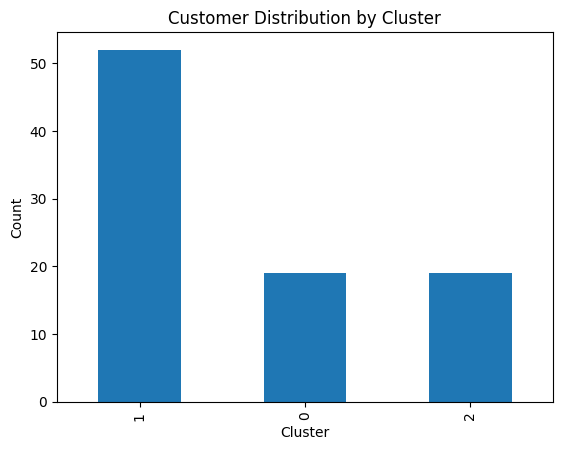

In [ ]:
df["cluster"].value_counts().plot(kind="bar")

plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Customer Distribution by Cluster")
plt.show()


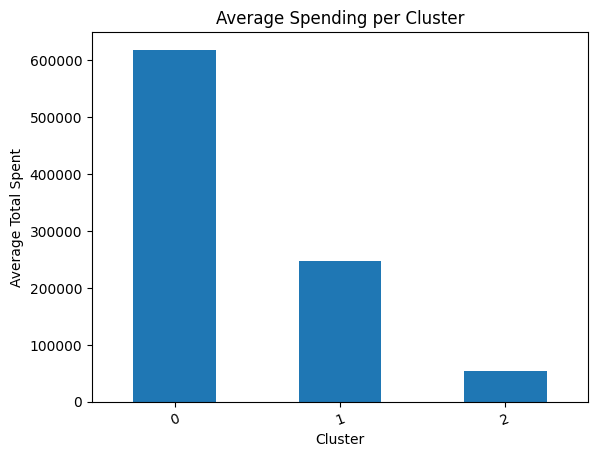

In [ ]:
df.groupby("cluster")["TotalSpent"].mean().plot(kind="bar")

plt.xlabel("Cluster")
plt.ylabel("Average Total Spent")
plt.title("Average Spending per Cluster")
plt.xticks(rotation=20)
plt.show()


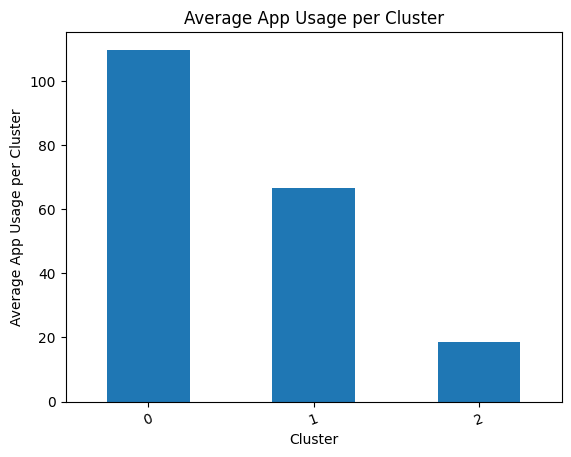

In [ ]:
df.groupby("cluster")["AppTimeMinutes"].mean().plot(kind="bar")

plt.xlabel("Cluster")
plt.ylabel("Average App Usage per Cluster")
plt.title("Average App Usage per Cluster")
plt.xticks(rotation=20)
plt.show()


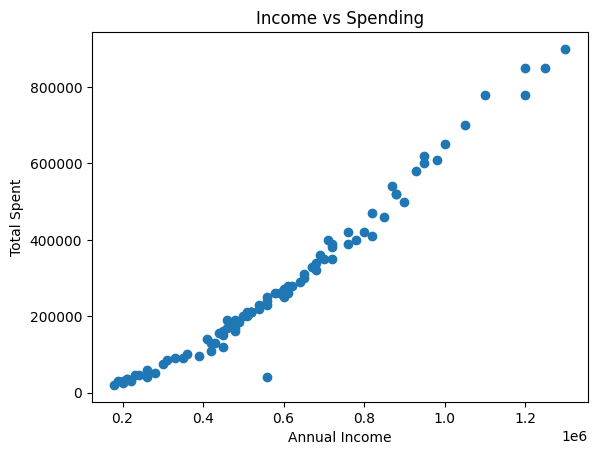

In [488]:
plt.scatter(df["AnnualIncome"], df["TotalSpent"])

plt.xlabel("Annual Income")
plt.ylabel("Total Spent")
plt.title("Income vs Spending")
plt.show()
